# Trabajo de la muestra

### Importación de librería

Se importan las librerías

In [2684]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Lectura de los datos

Se cargan y se leen los datos

In [2685]:
df_data = pd.read_csv("dataset/titanic.csv", index_col=None)
df_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Limpieza de los datos

Se elimina la columna "PassengerId"

In [2686]:
df_data = df_data.drop(columns=["PassengerId"])
df_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Revisión de datos nulos

Se genera un mapa de calor donde muestra los datos nulos en el dataframe para cada columna

<Axes: >

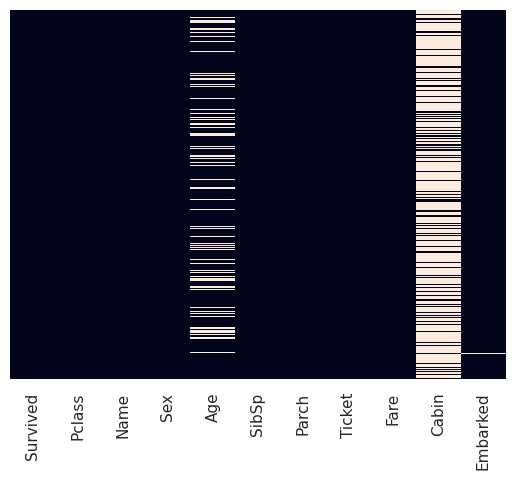

In [2687]:
sns.heatmap(df_data.isnull(), yticklabels=False, cbar=False)

Cada linea blanca representa un dato faltante, entonces se puede observar lo siguiente:
- En la columna "Age" faltan datos, pero no tantos como para no tomar en cuenta la tabla
- En la columna "Cabin" faltan demasiados datos, tanto como para eliminar la tabla.

Se decidió completar los nulos de la columna "Age" con la media del gráfico X, aparte se dropeo la columna "Cabin"

In [2688]:
df_data = df_data.drop(columns=["Cabin"])

Se rellenan los datos nulos con la media de edad (Age) para cada clase (Pclass)

In [2689]:
age_by_pclass = df_data.groupby('Pclass')['Age'].mean()

# Relleno de datos nulos
df_data['Age'] = df_data.apply(lambda row: age_by_pclass[row['Pclass']] if pd.isnull(row['Age']) else row['Age'], axis=1)
df_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C


Se genera de nuevo un mapa de calor para ver los datos nulos despues del relleno de nulos

<Axes: >

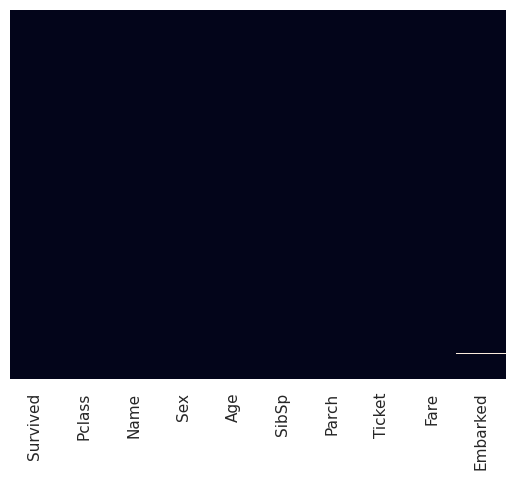

In [2690]:
sns.heatmap(df_data.isnull(), yticklabels=False, cbar=False)

Se guarda el dataframe en un .csv aparte en "results"

In [2691]:
df_data.to_csv("results/titanic_cat.csv", index=False)

# Detección de outliers 
En esta segunda etapa se utilizarán tres métodos para detectar outliers:
- IQR
- Isolation Forest
- Z-Score

In [2692]:
import numpy as np

q1 = np.quantile(df_data["Age"], .25)
q3 = np.quantile(df_data["Age"], .75)

iqr = q3-q1

min_range = q1 - 1.5*iqr
max_range = q3 + 1.5*iqr

[min_range, max_range]

[-0.5, 59.5]

La columna "False" quiere decir que hay valores que no se encuentra entre el rango del mínimo y máximo, por ende que hay 26 outliers

In [2693]:
df_data["Age_outlier"] = df_data["Age"].between(min_range, max_range)
df_data["Age_outlier"].value_counts()

Age_outlier
True     865
False     26
Name: count, dtype: int64

In [2694]:
from scipy.stats import zscore

Y = df_data.drop(columns=["Survived", "Pclass", "Name", "Sex", "SibSp", "Ticket", "Parch", "Fare", "Embarked", "Age_outlier"])
z_scores = Y.apply(zscore)

umbral = 3
outliers_count = (z_scores.abs() > umbral).sum()

total_outliers = outliers_count.sum()
print("Cantidad total de outliers en el dataset:", total_outliers)


Cantidad total de outliers en el dataset: 7


### IQR para los conjunto de columnas
Se crea una función de IQR para detectar outliers entre un par de columnas

In [2695]:
def detecting_outlier(df_data, name_column1, name_column2):
    q1_col1 = np.quantile(df_data[name_column1], 0.25)
    q3_col1 = np.quantile(df_data[name_column1], 0.75)
    iqr_col1 = q3_col1 - q1_col1

    q1_col2 = np.quantile(df_data[name_column2], 0.25)
    q3_col2 = np.quantile(df_data[name_column2], 0.75)
    iqr_col2 = q3_col2 - q1_col2

    min_range_col1 = q1_col1 - 1.5 * iqr_col1
    max_range_col1 = q3_col1 + 1.5 * iqr_col1

    min_range_col2 = q1_col2 - 1.5 * iqr_col2
    max_range_col2 = q3_col2 + 1.5 * iqr_col2

    return df_data[name_column1].between(min_range_col1, max_range_col1) & df_data[name_column2].between(min_range_col2, max_range_col2)

In [2696]:
df_data_outlier = pd.DataFrame() 
df_data_profile = df_data.drop(columns=["Name", "Sex", "SibSp", "Parch", "Ticket", "Embarked", "Age_outlier"])

for i, column1 in enumerate(df_data_profile.columns):
    for column2 in df_data_profile.columns[i+1:]:
        if column1 != "Age_outlier" and df_data_profile[column1].dtype != pd.StringDtype \
                and column2 != "Age_outlier" and df_data_profile[column2].dtype != pd.StringDtype:
            print("Processing columns: ", column1, " and ", column2)
            outliers = detecting_outlier(df_data_profile, column1, column2)
            df_data_outlier[column1 + '_' + column2 + '_outlier'] = outliers


Processing columns:  Survived  and  Pclass
Processing columns:  Survived  and  Age
Processing columns:  Survived  and  Fare
Processing columns:  Pclass  and  Age
Processing columns:  Pclass  and  Fare
Processing columns:  Age  and  Fare


In [2697]:
matrix_summary = []

for column in df_data_outlier.columns:
    value_counts = df_data_outlier[column].value_counts()

    if True in value_counts.index:
        false_values = value_counts[True]
    else:
        false_values = 0

    if False in value_counts.index:
        true_values = value_counts[False]
    else:
        true_values = 0

    row = [
        column,
        false_values,
        true_values
    ]

    matrix_summary.append(row)

summary_outliers = pd.DataFrame(data=matrix_summary, columns=["column", "False", "True"])

In [2698]:
summary_outliers

,column,False,True
0,Survived_Pclass_outlier,891,0
1,Survived_Age_outlier,865,26
2,Survived_Fare_outlier,775,116
3,Pclass_Age_outlier,865,26
4,Pclass_Fare_outlier,775,116
5,Age_Fare_outlier,755,136


In [2699]:
b = summary_outliers["True"].sum()
total = df_data.shape[0]

porcentaje_b = round(b / total * 100, 2)

print("[IRQ] Cantidad total de outliers en el dataset es de: {} de un total de {} datos ({}%)".format(b, total, porcentaje_b))

[IRQ] Cantidad total de outliers en el dataset es de: 420 de un total de 891 datos (47.14%)


### Isolation Forest

Se aplicó "Isolation Forest" para la misma tabla que se aplicó IQR para comparar su cantidad de outliers, donde se puede observar que existen 308 outliers

In [2700]:
from sklearn.ensemble import IsolationForest

X = df_data.drop(columns=["Name", "Sex", "SibSp", "Parch", "Ticket", "Embarked", "Age_outlier"])
clf = IsolationForest(random_state=0).fit(X)
X["is_outlier"] = clf.predict(X)
X["is_outlier"].value_counts()

is_outlier
 1    583
-1    308
Name: count, dtype: int64

In [2701]:
b = (X["is_outlier"] == -1).sum()
total = X.shape[0]

porcentaje_b = round(b / total * 100, 2)

#print("[Isolation Forest] El porcentaje de outlier (Isolation Forest) es de {:.2f}%".format(porcentaje_b))
print("[Isolation Forest] Cantidad total de outliers en el dataset es de: {} de un total de {} datos ({}%)".format(b, total, porcentaje_b))

[Isolation Forest] Cantidad total de outliers en el dataset es de: 308 de un total de 891 datos (34.57%)


### Z-Score

Se aplicó "Z-Score" para la misma tabla anterior (IQR e Isolation Forest) para comparar su cantidad de outliers, donde se puede observar un bajo número de outliers (68)

In [2702]:
from scipy.stats import zscore

Y = df_data.drop(columns=["Survived", "Name", "Sex", "SibSp", "Ticket", "Embarked", "Age_outlier"])

z_scores = Y.apply(zscore)

umbral = 3
outliers_count = (z_scores.abs() > umbral).sum()

outliers_count

Pclass     0
Age        7
Parch     15
Fare      20
dtype: int64

In [2703]:
total_outliers = outliers_count.sum()
total_datos = Y.shape[0]
porcentaje = round(outliers_count.sum()/total_datos*100,2)
print("[Z-Score] Cantidad total de outliers en el dataset es de: {} de un total de {} datos ({}%)".format(total_outliers, total, porcentaje))

[Z-Score] Cantidad total de outliers en el dataset es de: 42 de un total de 891 datos (4.71%)


# Visualización de la muestra

Se representan mediante gráficos algunos ejemplos a analizar de la muestra

In [2704]:
df_age = pd.DataFrame(df_data)
df_age["Age"] = df_data["Age"].round().astype(int)

Text(0, 0.5, 'Cantidad')

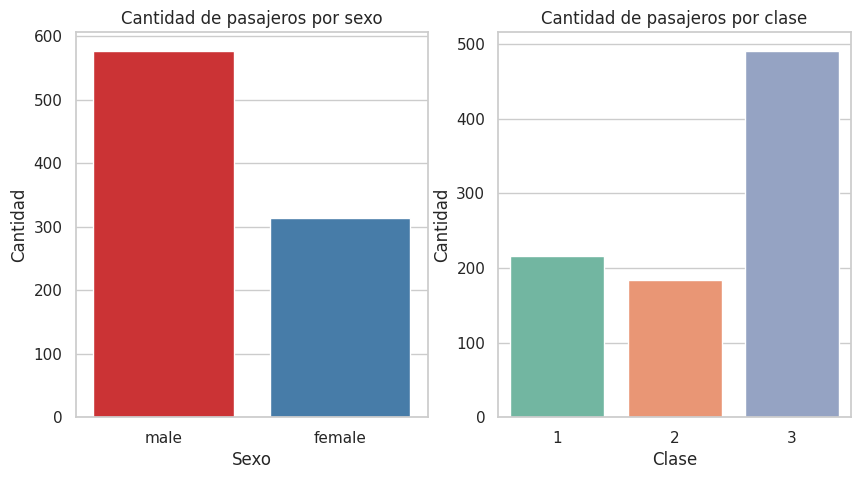

In [2705]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

sns.countplot(ax=axes[0], x='Sex', data=df_data, palette="Set1")
axes[0].set_title('Cantidad de pasajeros por sexo')
axes[0].set_xlabel('Sexo')
axes[0].set_ylabel('Cantidad')

sns.countplot(ax=axes[1], x='Pclass', data=df_data, palette="Set2")
axes[1].set_title('Cantidad de pasajeros por clase')
axes[1].set_xlabel('Clase')
axes[1].set_ylabel('Cantidad')

Text(0, 0.5, 'Cantidad')

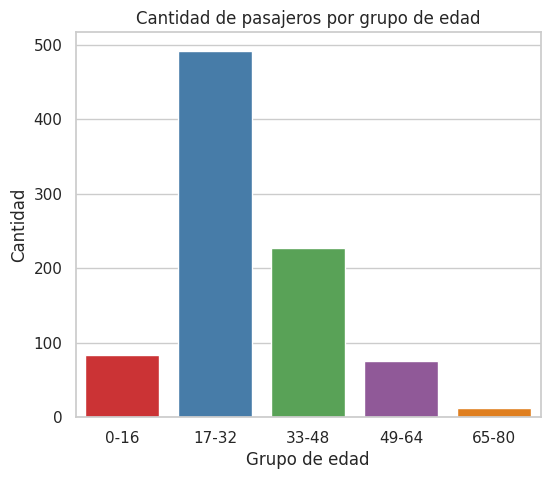

In [2706]:
bins = [0, 16, 32, 48, 64, 80]
labels = ['0-16', '17-32', '33-48', '49-64', '65-80']
plt.figure(figsize=(6, 5))

df_age['Age_Group'] = pd.cut(df_age['Age'], bins=bins, labels=labels, right=False)
sns.countplot( x='Age_Group', data=df_age, palette="Set1")

plt.title('Cantidad de pasajeros por grupo de edad')
plt.xlabel('Grupo de edad')
plt.ylabel('Cantidad')

Text(0, 0.5, 'Cantidad de sobrevivientes')

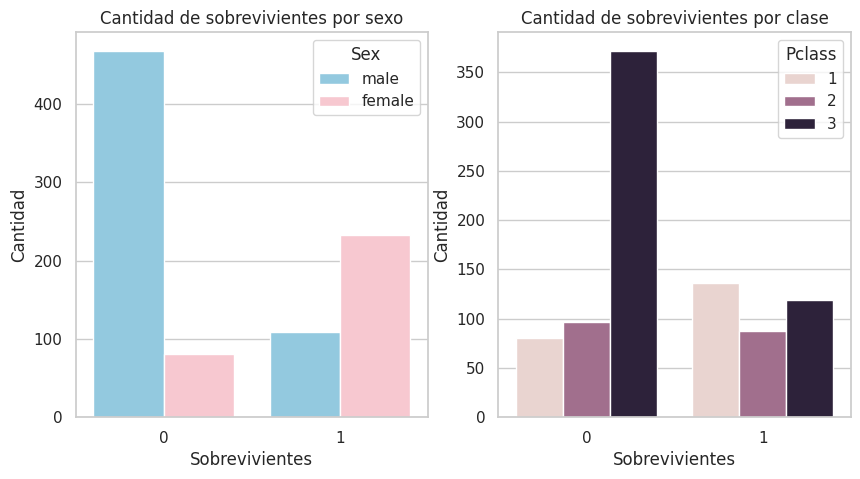

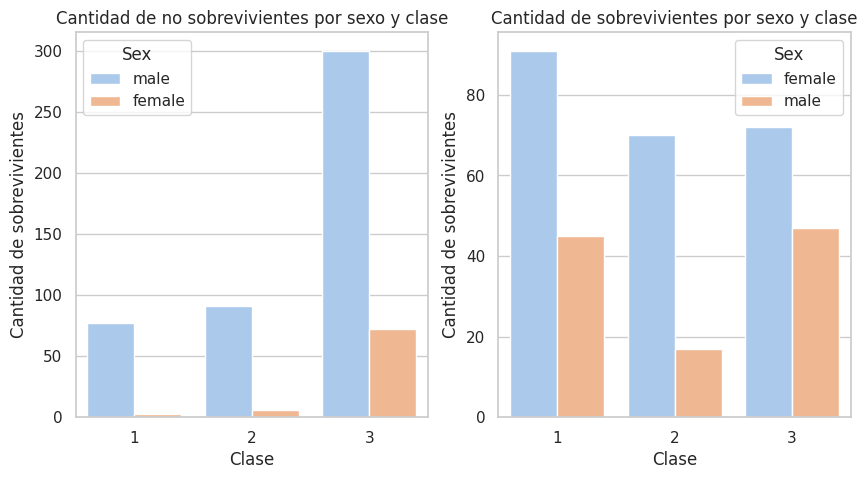

In [2707]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

sns.countplot(ax=axes[0], x='Survived', hue='Sex', data=df_data, palette={'male': '#87CEEB', 'female': 'pink'})
axes[0].set_title('Cantidad de sobrevivientes por sexo')
axes[0].set_xlabel('Sobrevivientes')
axes[0].set_ylabel('Cantidad')

sns.countplot(ax=axes[1], x='Survived', hue='Pclass', data=df_data)
axes[1].set_title('Cantidad de sobrevivientes por clase')
axes[1].set_xlabel('Sobrevivientes')
axes[1].set_ylabel('Cantidad')

fig, axes = plt.subplots(1,2, figsize=(10,5))

sns.countplot(ax=axes[0], x='Pclass', hue='Sex', data=df_data[df_data["Survived"] == 0], palette='pastel')
axes[0].set_title('Cantidad de no sobrevivientes por sexo y clase')
axes[0].set_xlabel('Clase')
axes[0].set_ylabel('Cantidad de sobrevivientes')

sns.countplot(ax=axes[1], x='Pclass', hue='Sex', data=df_data[df_data["Survived"] == 1], palette='pastel')
axes[1].set_title('Cantidad de sobrevivientes por sexo y clase')
axes[1].set_xlabel('Clase')
axes[1].set_ylabel('Cantidad de sobrevivientes')

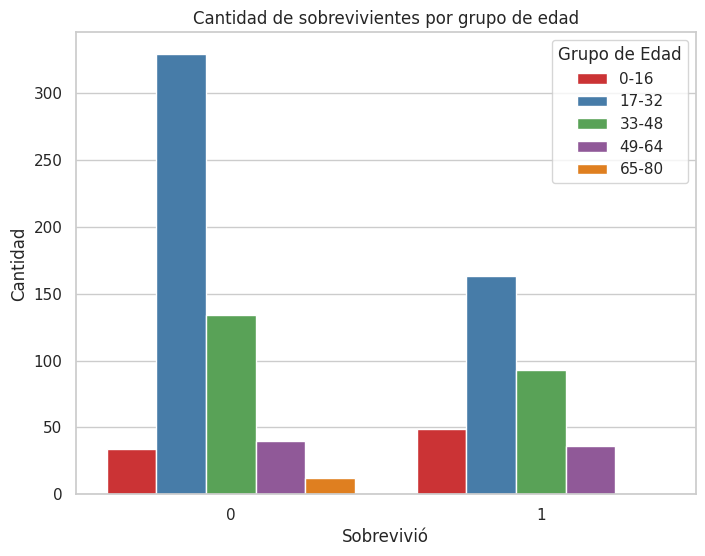

In [2708]:
plt.figure(figsize=(8, 6))

sns.countplot(x='Survived', hue='Age_Group', data=df_age, palette="Set1")

plt.title('Cantidad de sobrevivientes por grupo de edad')
plt.xlabel('Sobrevivió')
plt.ylabel('Cantidad')
plt.legend(title='Grupo de Edad')

Text(0, 0.5, 'Edad')

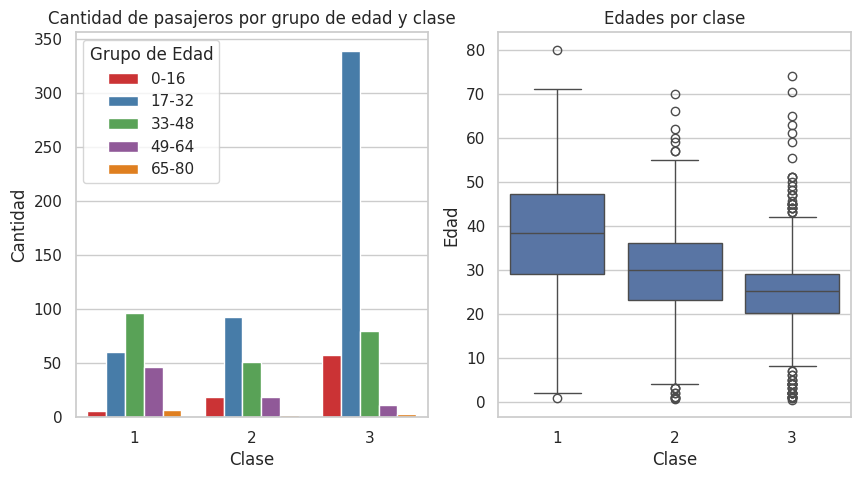

In [2709]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Primer subplot: countplot de cantidad de sobrevivientes por grupo de edad y clase
sns.countplot(ax=axes[0], x='Pclass', hue='Age_Group', data=df_age, palette="Set1")
axes[0].set_title('Cantidad de pasajeros por grupo de edad y clase')
axes[0].set_xlabel('Clase')
axes[0].set_ylabel('Cantidad')
axes[0].legend(title='Grupo de Edad')

# Segundo subplot: boxplot de edades por clase
sns.boxplot(ax=axes[1], data=df_data, x="Pclass", y="Age")
axes[1].set_title('Edades por clase')
axes[1].set_xlabel('Clase')
axes[1].set_ylabel('Edad')

Text(0, 0.5, 'Edad')

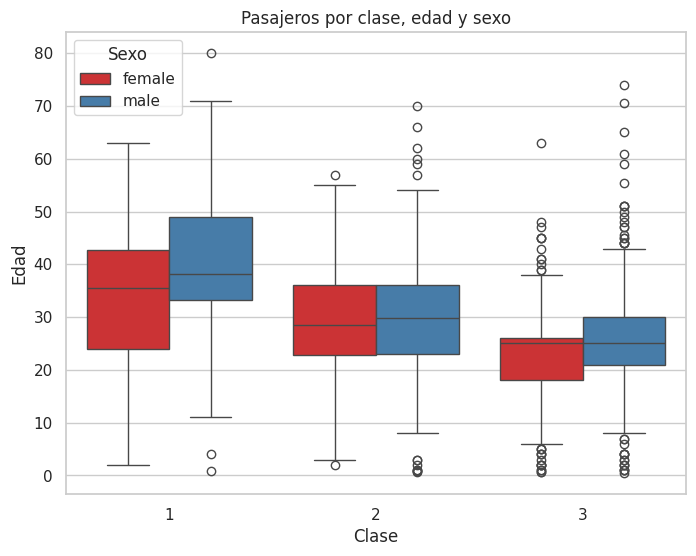

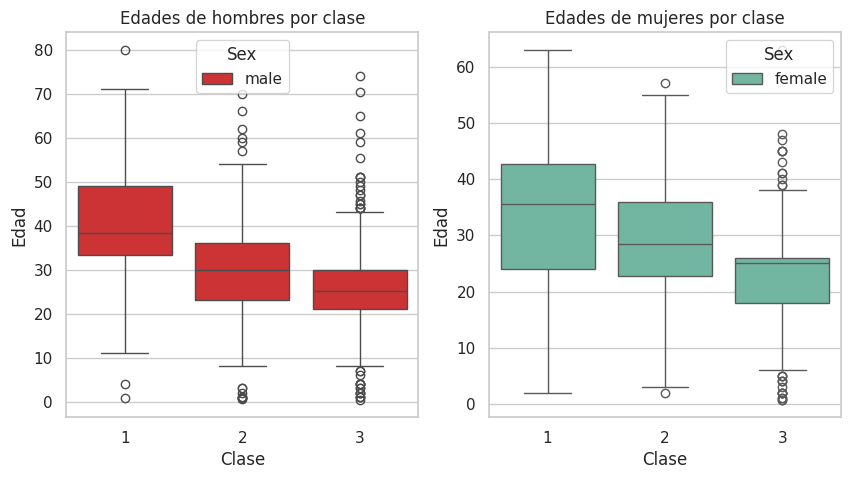

In [2710]:
plt.figure(figsize=(8, 6))

sns.boxplot(data=df_data, x="Pclass", y="Age", hue="Sex", palette="Set1")
plt.title('Pasajeros por clase, edad y sexo')
plt.xlabel('Clase')
plt.ylabel('Edad')
plt.legend(title='Sexo')

fig, axes = plt.subplots(1,2, figsize=(10,5))

sns.boxplot(ax=axes[0], data=df_data.query("Sex == 'male'"), x="Pclass", y="Age", hue="Sex", palette="Set1")
axes[0].set_title('Edades de hombres por clase')
axes[0].set_xlabel('Clase')
axes[0].set_ylabel('Edad')

sns.boxplot(ax=axes[1], data=df_data.query("Sex == 'female'"), x="Pclass", y="Age", hue="Sex", palette="Set2")
axes[1].set_title('Edades de mujeres por clase')
axes[1].set_xlabel('Clase')
axes[1].set_ylabel('Edad')